# Assignment 1: Linear Regression

## Question 1

Import dependencies

In [1]:
import numpy as np
import matplotlib.pyplot as plt 

Load the data

In [2]:
X_train = np.load('x_train.npy')
y_train = np.load('y_train.npy')
X_test = np.load('x_test.npy')
y_test = np.load('y_test.npy')

In [3]:
# Format the X variables into 2D vectors
if X_train.ndim == 1: X_train = X_train.reshape(-1, 1)
if X_test.ndim == 1: X_test = X_test.reshape(-1, 1)

In [4]:
# Verifying the data
print(f'Shape of x_train: {X_train.shape}')
print(f'Shape of y_train: {y_train.shape}')
print(f'Shape of x_test: {X_test.shape}')
print(f'Shape of y_test: {y_test.shape}')

Shape of x_train: (100, 1)
Shape of y_train: (100,)
Shape of x_test: (100, 1)
Shape of y_test: (100,)


Plot the relationship between training and testing data

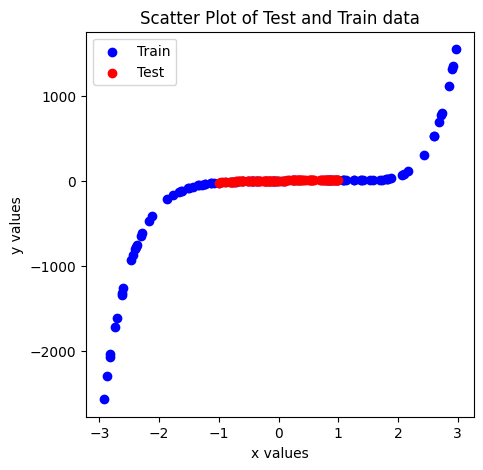

In [5]:
plt.figure(figsize=(5,5))
plt.scatter(X_train, y_train, color='blue')
plt.scatter(X_test, y_test, color='red')
plt.xlabel('x values')
plt.ylabel('y values')
plt.title('Scatter Plot of Test and Train data')
plt.legend(['Train', 'Test'])
plt.show()

1a) As shown from the graph above, the relationship is not linear.

1b) Due to the nonlinear relationship, feature engineering for nonlinearity is

*   i) The nonlinear transformations would be applied to the training data for determining the best fit line, which would then be used on the testing data, which would also have the transformation applied to it.
*   ii) Exponential functions (quadratic, cubic, and so on).
    

Simple Linear Regression

In [6]:
class LinearRegression():

  def __init__(self):
    self.weights = None
    self.bias = None

  def train(self, X, y):
    m = X.shape[0]
    # Augment X_train with a column of ones (for the intercept)
    X_aug = np.c_[np.ones((m, 1)), X]  # shape: (m, n_features+1)
        
    # Compute the optimal parameters using the normal equation:
    # theta = (X_train_b^T * X_train_b)^(-1) * X_train_b^T * y_train

    xTx = np.dot(X_aug.T, X_aug)
    xTy = np.dot(X_aug.T, y)
    theta = np.linalg.inv(xTx).dot(xTy)
        
    # The first parameter is the bias (intercept) and the rest are the weights.
    self.bias = theta[0]
    self.weights = theta[1:]

  # Create predictions
  def predict(self, X):
    return np.dot(X, self.weights) + self.bias

  # Calculate loss (mean squared error)
  def mean_squared_error(self, y, y_pred):
    return np.mean((y - y_pred) ** 2)

In [7]:
# Instantiate and train the model using the normal equation
model = LinearRegression()
model.train(X_train, y_train)

# Make predictions on the training and test data
y_train_pred = model.predict(X_train)
y_test_pred  = model.predict(X_test)

# Compute the Mean Squared Error (MSE) for training and testing data
mse_train = model.mean_squared_error(y_train, y_train_pred)
mse_test  = model.mean_squared_error(y_test, y_test_pred)

# Print the Mean Squared Error (MSE) Values
print("Mean Squared Error (Train):", mse_train)
print("Mean Squared Error (Test):", mse_test)

# Print out the linear equation.
print("Linear Equation: y = {:.4f} + {:.4f}x".format(model.bias, model.weights[0]))

Mean Squared Error (Train): 172822.60339569923
Mean Squared Error (Test): 35281.339904469234
Linear Equation: y = -106.1738 + 300.6195x


Plot the regression line for Train and Test 

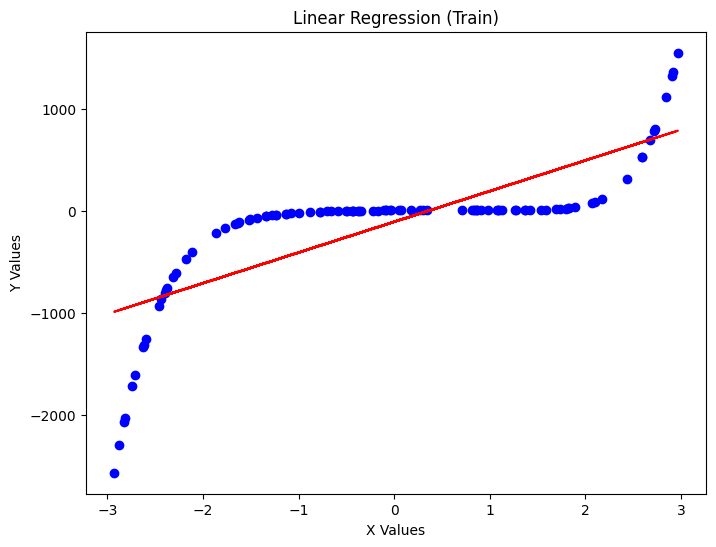

In [8]:
# Train
plt.figure(figsize=(8,6))
plt.scatter(X_train, y_train, color='blue')
plt.plot(X_train, y_train_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Train)')
plt.show()

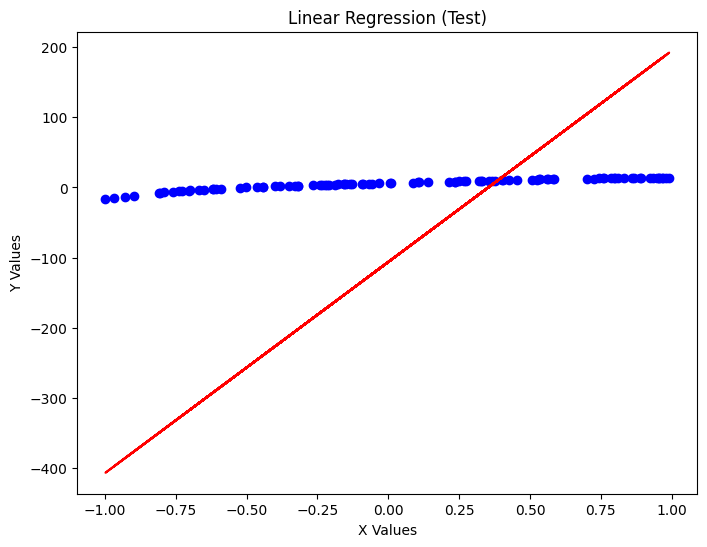

In [9]:
# Test
plt.figure(figsize=(8,6))
plt.scatter(X_test, y_test, color='blue')
plt.plot(X_test, y_test_pred, color='red')
plt.xlabel('X Values')
plt.ylabel('Y Values')
plt.title('Linear Regression (Test)')
plt.show()

As shown above, the output from the simple linear regression model does not fit well with the data, therefore feature engineering for nonlinearity is needed.

In [52]:
import numpy as np
import matplotlib.pyplot as plt
from itertools import combinations_with_replacement


class PolynomialRegression:
    def __init__(self, degree):
        self.degree = degree
        self.weights = None
        self.bias = None

    def train(self, X, y):
        m = X.shape[0]
        # Create a Vandermonde matrix for X with powers from 0 up to 'degree'
        X_poly = np.ones((m, self.degree + 1))
        for d in range(1, self.degree + 1):
            X_poly[:, d] = X[:, 0] ** d

        # Using normal equations for updating theta.
        xTx = X_poly.T.dot(X_poly)
        xTy = X_poly.T.dot(y)
        theta = np.linalg.inv(xTx).dot(xTy)
        return theta

    # Define a prediction function for polynomial regression
    def predict(self, X, theta):
        # Ensure X_new is 2D
        if X.ndim == 1:
            X = X.reshape(-1, 1)
        degree = len(theta) - 1
        X_poly = np.ones((len(X), degree + 1))
        for d in range(1, degree + 1):
            X_poly[:, d] = X[:, 0] ** d
        y_pred = X_poly.dot(theta)
        return y_pred
    
    
   # Calculate loss (mean squared error)
    def mean_squared_error(self, y, y_pred):
        return np.mean((y - y_pred) ** 2)
    
    # Generating polynomial features (ONLY FOR QUESTION 2)
    def generate_polynomial_features(self, X):
        """Manually create polynomial features up to a given degree"""
        m, n = X.shape  # m = samples, n = features
        features = [np.ones(m)]  # Start with bias (intercept term)

        # Generate polynomial features for each feature combination
        for d in range(1, self.degree + 1):
            for combination in combinations_with_replacement(range(n), d):
                new_feature = np.prod(X[:, combination], axis=1)
                features.append(new_feature)


In [14]:
# Choose the degree for polynomial regression (adjust as needed)
degree=7
polynomial_model = PolynomialRegression(degree)
# degree_poly = 7  # Note: Comment mentioned degree 8; change here if needed.
theta = polynomial_model.train(X_train, y_train)

# Generate predictions for polynomial regression on training data
X_min_train, X_max_train = X_train.min(), X_train.max()
X_poly_train = np.linspace(X_min_train, X_max_train, 100).reshape(-1, 1)
pred_poly_train = polynomial_model.predict(X_poly_train, theta)

# Generate predictions for polynomial regression on test data
X_min_test, X_max_test = X_test.min(), X_test.max()
X_poly_test = np.linspace(X_min_test, X_max_test, 100).reshape(-1, 1)
pred_poly_test = polynomial_model.predict(X_poly_test, theta)

print("Polynomial Equation (Degree = {}) - ".format(degree), theta)


Polynomial Equation (Degree = 7) -  [ 6.00000000e+00  1.00000000e+01 -4.54747351e-12  4.00000000e+00
 -8.00000000e+00  6.13908924e-12 -9.94759830e-14  1.00000000e+00]


Plot the results from polynomial regression

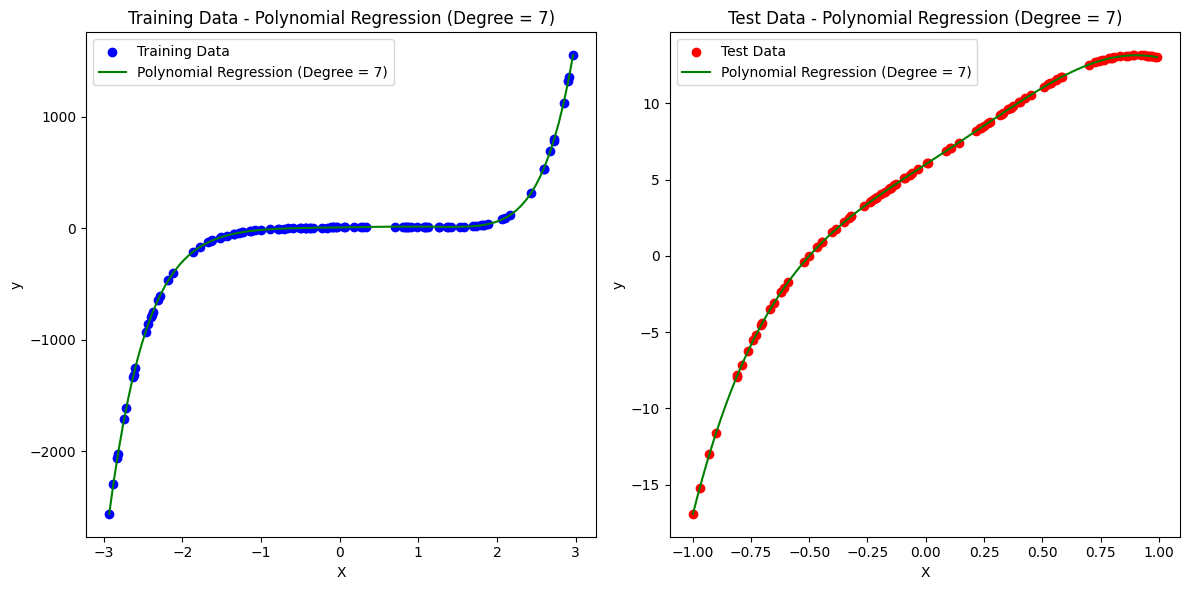

In [15]:
plt.figure(figsize=(12, 6))

# Plot training data with polynomial regression fit
plt.subplot(1, 2, 1)
plt.scatter(X_train, y_train, color='blue', label='Training Data')
plt.plot(X_poly_train, pred_poly_train, "g-", 
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

# Plot test data with polynomial regression fit
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='red', label='Test Data')
plt.plot(X_poly_test, pred_poly_test, "g-", 
         label='Polynomial Regression (Degree = {})'.format(degree))
plt.xlabel("X")
plt.ylabel("y")
plt.title("Test Data - Polynomial Regression (Degree = {})".format(degree))
plt.legend()

plt.tight_layout()
plt.show()

## Question 2

Must install openpyxl before loading Excel files with Pandas

In [16]:
pip install openpyxl

Defaulting to user installation because normal site-packages is not writeableNote: you may need to restart the kernel to use updated packages.




[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\skuma\AppData\Local\Microsoft\WindowsApps\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\python.exe -m pip install --upgrade pip


Preprocess the data

In [37]:
import pandas as pd 

# Upload the excel file using Pands and OpenPyXL
housing_train = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Train')
housing_test = pd.read_excel('Housing_data_regression.xlsx', sheet_name='Test')

housing_x_train = housing_train.drop(columns=['House ID', 'Price'])
housing_y_train = housing_train['Price']

housing_x_test = housing_test.drop(columns=['House ID', 'Local Price'])
housing_y_test = housing_test['Local Price'].astype('float')


In [31]:
housing_x_train

,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1.0,3.4720,0.998,1.0,7,4,42
1,1.0,3.5310,1.500,2.0,7,4,62
2,1.0,2.2750,1.175,1.0,6,3,40
3,1.0,4.0500,1.232,1.0,6,3,54
4,1.0,4.4550,1.121,1.0,6,3,42
5,1.0,4.4550,0.988,1.0,6,3,56
6,1.0,5.8500,1.240,1.0,7,3,51
7,1.0,9.5200,1.501,0.0,6,3,32
8,2.5,9.8000,3.420,2.0,10,5,42
9,2.5,12.8000,3.000,2.0,9,5,14


In [30]:
housing_y_train[0:10]

0     491760.0
1     502080.0
2     454290.0
3     455730.0
4     505970.0
5     389100.0
6     589800.0
7     560390.0
8    1642020.0
9    1445980.0
Name: Price, dtype: float64

In [35]:
housing_x_test

,Bathrooms,Land Area,Living area,# Garages,# Rooms,# Bedrooms,Age of home
0,1.5,6.7265,1.652,1.0,6,3,44
1,1.5,9.1500,1.777,2.0,8,4,48
2,1.0,8.0000,1.504,2.0,7,3,3
3,1.5,7.3262,1.831,1.5,8,4,31
4,1.5,5.0000,1.200,2.0,6,3,30


In [38]:
housing_y_test

0     609310.0
1     836070.0
2     814000.0
3     914160.0
4    1200000.0
Name: Local Price, dtype: float64

In [69]:
# Select multiple features (e.g., "Land Area" and "Living area")
feature_columns = ["Bathrooms", 
                   "Land Area", 
                   "Living area",
                   "# Garages",
                   "# Rooms",
                   "# Bedrooms",
                   "Age of home"]  
housing_x_train = housing_train[feature_columns].values
housing_y_train = housing_train["Price"].values

housing_x_test = housing_test[feature_columns].values
housing_y_test = housing_test["Local Price"].values

# Train polynomial regression with multiple features
degree = 3  # Adjust degree as needed
housing_model_multi = PolynomialRegression(degree)
housing_theta = housing_model_multi.train(housing_x_train, housing_y_train)

# Predict on training and test sets
housing_pred_train = housing_model_multi.predict(housing_x_train, housing_theta)
housing_pred_test = housing_model_multi.predict(housing_x_test, housing_theta)

# Print the MSE
print(f'Train MSE: {housing_model_multi.mean_squared_error(housing_y_train, housing_pred_train)}')
print(f'Test MSE: {housing_model_multi.mean_squared_error(housing_y_test, housing_pred_test)}')


Train MSE: 399265929428.8
Test MSE: 194676875681.6


Plot the results for the Housing Cost prediction using the polynomial regression.